In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
import os
from tqdm import tqdm
import re
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from datetime import datetime
from nltk.tokenize import word_tokenize, sent_tokenize,RegexpTokenizer
from nltk.corpus import stopwords 


Using TensorFlow backend.


In [2]:
df=pd.read_json("Cell_Phones_and_Accessories.json")

In [3]:
df

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
10,1,True,"01 14, 2016",B00IJJCQBA,{'Color:': ' Black / Black'},Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600,None,None
100,5,False,"06 21, 2017",B00NIJOGOG,{'Color:': ' Rose Gold [6+] CHOOSE CORRECT SIZ...,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200,None,None
1000,3,True,"06 10, 2015",B00MQYS97Y,None,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400,None,None
10000,5,False,"06 10, 2016",B01E6VQ7R8,None,D. Michael,"This charger has a solid appearance, and is ve...","This charger has a solid appearance, and is ve...",1465516800,None,None
100000,1,True,"04 8, 2018",B00NSBA86O,{'Color:': ' Y-White'},Leekyungjoo,not good,One Star,1523145600,None,None
100001,5,False,"07 22, 2015",B00OHE8AOI,{'Color:': ' Black'},Amazon Customer,Works well if you need are charger of this sty...,Works well if you need are charger of this sty...,1437523200,None,None
100002,3,True,"04 23, 2015",B00S93RMLU,None,Michael Carr,An average plastic cover.,Three Stars,1429747200,None,None
100003,5,True,"03 13, 2017",B016OFYGXQ,{'Format:': ' Wireless Phone Accessory'},Leslie Bentley,Kids love this thing!,Five Stars,1489363200,None,None


# EDA , Data Preprocessing 

In [4]:
df.shape

(760450, 11)

In [5]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [6]:
df.drop(['Prod_img','Useful','Prod_meta'],axis=1,inplace=True)
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
10,1,True,"01 14, 2016",B00IJJCQBA,Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600
100,5,False,"06 21, 2017",B00NIJOGOG,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200
1000,3,True,"06 10, 2015",B00MQYS97Y,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400


In [7]:
df.shape

(760450, 8)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Rating              0
Rev_verify          0
Review_Date         0
IC                  0
Reviewer_Name       0
Review              0
Rev_summ            0
Review_timestamp    0
dtype: int64

In [10]:
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
dtype: object

In [11]:
df.Rev_verify.unique()

array([ True, False])

In [12]:
df.IC.unique().shape

(48133,)

In [13]:
#count_classes=pd.value_counts(df['IC'],sort=True)
#count_classes

In [14]:
df.nunique()

Rating                   5
Rev_verify               2
Review_Date           4362
IC                   48133
Reviewer_Name       121443
Review              636838
Rev_summ            366538
Review_timestamp      4362
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759513 entries, 0 to 99999
Data columns (total 8 columns):
Rating              759513 non-null int64
Rev_verify          759513 non-null bool
Review_Date         759513 non-null object
IC                  759513 non-null object
Reviewer_Name       759513 non-null object
Review              759513 non-null object
Rev_summ            759513 non-null object
Review_timestamp    759513 non-null int64
dtypes: bool(1), int64(2), object(5)
memory usage: 47.1+ MB


In [16]:
df['Review'].value_counts()[1:100]

Good                    3939
Excellent               2415
Great                   2318
ok                      2098
great                   1927
Love it                 1640
excellent               1462
love it                 1343
Nice                    1211
very good               1145
nice                    1093
Great product           1025
Perfect                  969
excelente                954
Works great              937
Ok                       927
works great              801
Very good                774
Excelente                697
Good product             691
perfect                  680
great product            673
Thanks                   582
Great!                   565
Awesome                  558
Works great!             548
good product             546
Love it!                 525
Great case               481
I love it                411
                        ... 
works good               183
bien                     176
Works well.              172
Works         

# Rating distribution


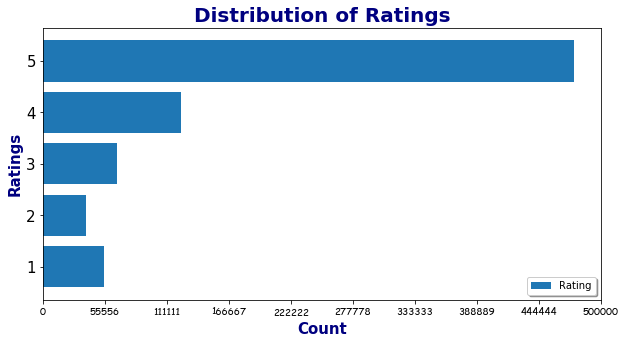

In [17]:
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['Rating'].value_counts().index )
y = list( df['Rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0,500000, 10)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Rating'], shadow=True, loc=4)
# loc=1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle


# What words do people use in their reviews

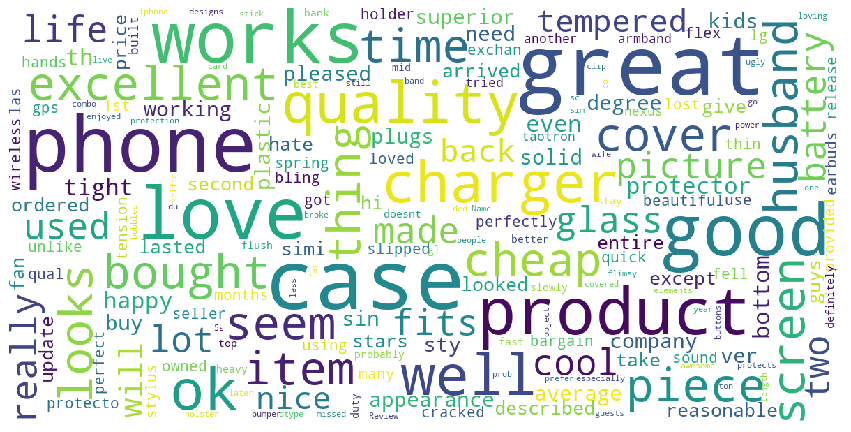

In [56]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Review'])

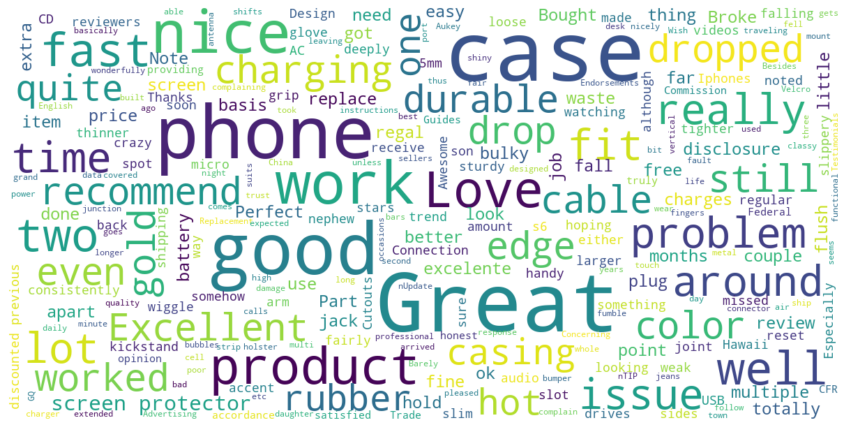

In [19]:

# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

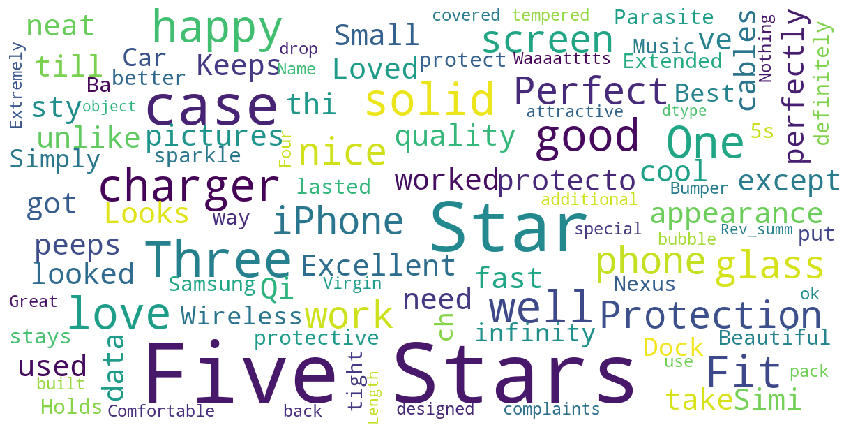

In [20]:
#review summary cloud
show_wordcloud(df['Rev_summ'])

In [21]:
# Let's see what are the popular IC , which has most reviews
df['IC'].value_counts()

B00VH88CJ0    1124
B005NF5NTK    1104
B019PV2I3G    1033
B00X5RV14Y    1018
B00P7N0320    1011
B018JW3EOY    1009
B00G7UY3EG     940
B00MQSMDYU     900
B00M51DDT2     838
B00QN1T6NM     796
B00D856NOG     748
B00IGISUTG     738
B0092KJ9BU     727
B00BT8L2MW     721
B00AANQLRI     701
B00UCZGS6S     699
B00NH12EHQ     671
B00MXWFUQC     665
B014EB532U     655
B00UH3L82Y     648
B00M6QODH2     645
B009YCP1LS     619
B0013G8PTS     614
B002BBJMO6     608
B00JH88NHI     607
B0085JRQZU     599
B00P933OJC     582
B004G1L52Q     571
B00M5JKZY0     570
B0194WDVHI     568
              ... 
B00E3DQC02       1
B00ZFRTHFC       1
B0087OYBME       1
B01CSE2F12       1
B00T5VE1NW       1
B018JYIUHS       1
B017X2BOWA       1
B0014Z2KBW       1
B005UL4E3I       1
B009CEKKOQ       1
B00Y1DJ9CW       1
B00PT9RR0S       1
B01GCQH0VC       1
B006A4OD4O       1
B000VSHMF2       1
B00WRD7HS6       1
B011DUDTJE       1
B01FVEZBH6       1
B00K6Q3PIC       1
B01BH93N10       1
B01G2LFEHY       1
B0012O87BM  

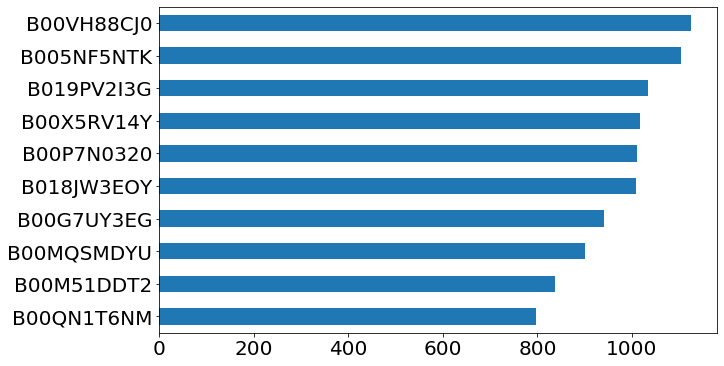

In [22]:
df['IC'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=20).invert_yaxis()

The product having ID 'B00VH88CJ0' has most reviews.

In [23]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
10,1,True,"01 14, 2016",B00IJJCQBA,Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600
100,5,False,"06 21, 2017",B00NIJOGOG,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200
1000,3,True,"06 10, 2015",B00MQYS97Y,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400


In [24]:
df['Reviewer_Name'].value_counts()

Amazon Customer                     25628
Kindle Customer                      2220
John                                 1109
Chris                                1060
Mike                                 1052
David                                 961
Michael                               782
Alex                                  597
Joe                                   597
Steve                                 567
James                                 566
Mark                                  540
Scott                                 515
Robert                                513
Jason                                 512
Kevin                                 505
Daniel                                494
Brian                                 494
Matt                                  491
Pen Name                              476
Jay                                   470
Jeff                                  468
Dave                                  459
Josh                              

# How many are verified review?

In [25]:
df['Rev_verify'].value_counts()

True     664592
False     94921
Name: Rev_verify, dtype: int64

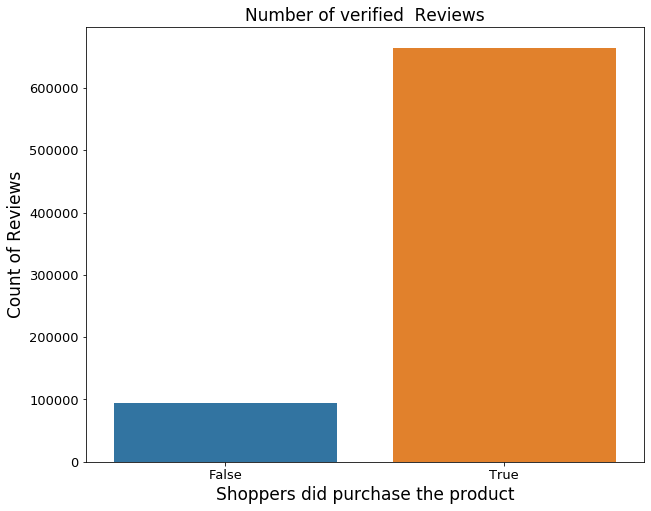

In [26]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['Rev_verify'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of verified  Reviews', fontsize=17)
ax.tick_params(labelsize=13)

# correlation map

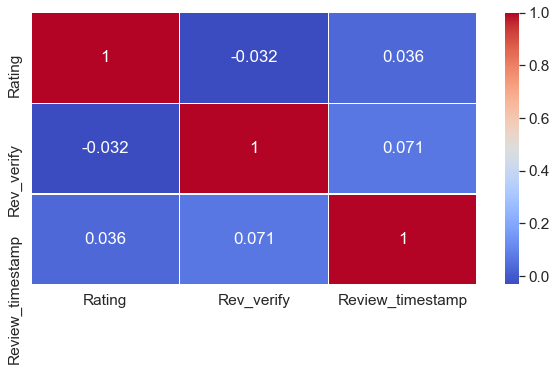

In [27]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

correlation heatmap is not useful rightnow because most of the features are object type.

# showing important keywords of a particular IC:-
    -By this we can just enter a particular IC and then all the keyword are present as wordclous
    -by which you can judge either it is positive or negative.

Enter id whose reviews you want to take:-B00VH88CJ0


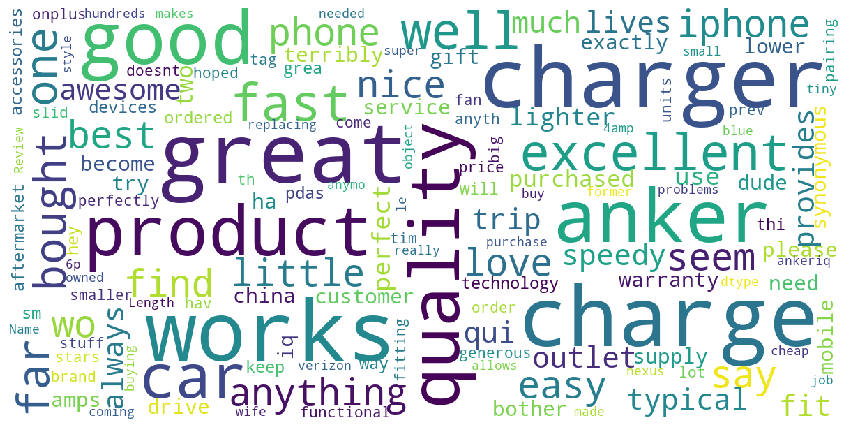

In [57]:

num=str(input('Enter id whose reviews you want to take:-'))
df1 = df[df['IC'] == num]
df1.head()
df1.shape

show_wordcloud(df1['Review'])

Enter id whose reviews you want to take:-B00VH88CJ0


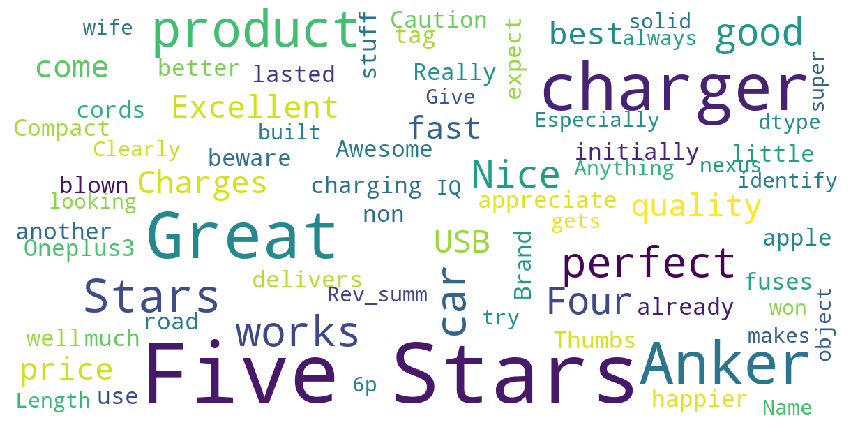

In [58]:

num=str(input('Enter id whose reviews you want to take:-'))
df1 = df[df['IC'] == num]
df1.head()
df1.shape

show_wordcloud(df1['Rev_summ'])

BY this cloud we can say it has a good review.

In [30]:
#find those IC which have 1 ratings
df2 = df[df['Rating'] == 1]

In [31]:
df2['IC'].value_counts()

B00UH3L82Y    108
B00G7UY3EG     96
B00MU6MWEY     72
B00MXWFUQC     68
B00UH3K244     67
B01CDVZAH6     64
B00UCZGS6S     57
B00HIMOGMG     57
B014EB532U     55
B0092KJ9BU     52
B002BBJMO6     51
B003UC93WQ     48
B00IZ1XJ3Q     47
B0132XCT0U     46
B010MVQBBI     45
B00M5JKZY0     45
B00NGMVD8W     44
B0014KOB6Y     44
B00D7KGLF8     42
B00GP0GUC6     41
B007C5S3AU     40
B00OBSPWD2     40
B005NF5NTK     40
B004LSN0GS     40
B00NCJ4GP6     39
B00GXHPN1U     39
B005JHIYLG     38
B00VWKKHKU     37
B00QN1T6NM     37
B004WXC4P0     36
             ... 
B001EULXGU      1
B01E63C2DO      1
B0070ZX244      1
B003SHN1ZS      1
B00YD54Q0I      1
B013O3I3I0      1
B012KWH91S      1
B00KMMRKX6      1
B000BK1QSE      1
B005JVNYSA      1
B00LA7IH7U      1
B00IBLUILG      1
B00B50I2T0      1
B00ANI0612      1
B00FP1Q5KS      1
B004EKJTKE      1
B005P0YJBG      1
B00VZTDZWA      1
B00O2HJS64      1
B00UWR6FUK      1
B00T3QPQWY      1
B01AT6WZ9S      1
B00HYPC6F6      1
B010CDCL9W      1
B006Z4441G

This IC 'B00UH3L82Y' have most 1 rating review.

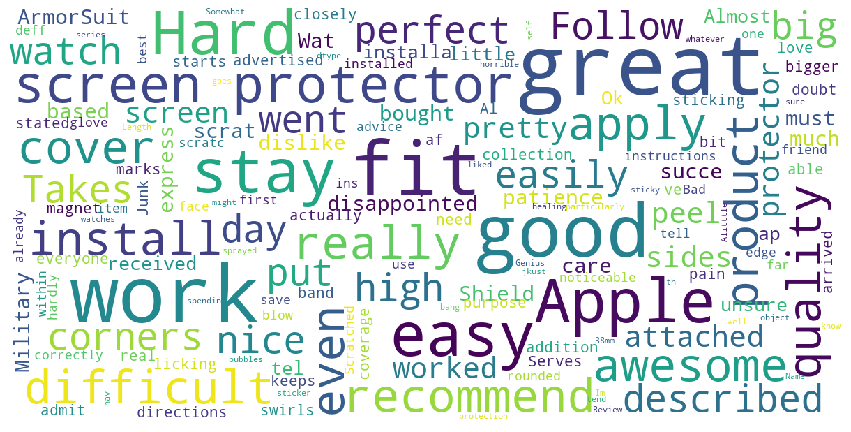

In [32]:
#wordcloud of B00UH3L82Y 
df1 = df[df['IC'] == 'B00UH3L82Y']
df1.head()
df1.shape

show_wordcloud(df1['Review'])

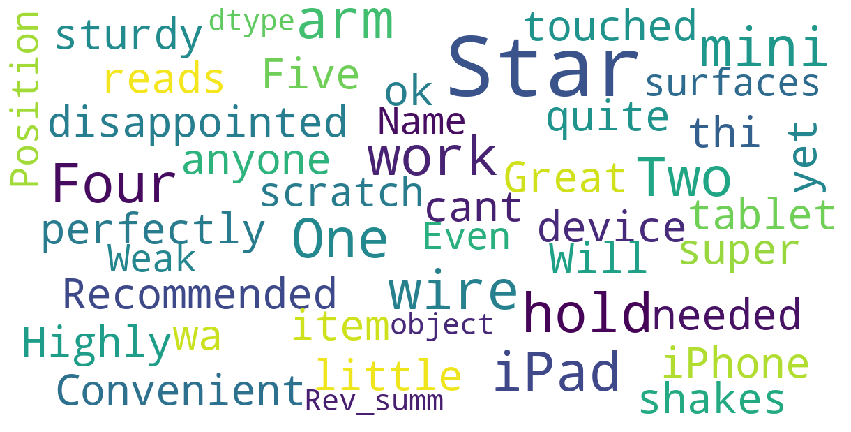

In [33]:
df1 = df[df['IC'] == 'B00NSBA86O']
df1.head()
df1.shape

show_wordcloud(df1['Rev_summ'])

BY this we can see there is not much keywords which give a positive feedback , so this a an example of low review product.

# MAXIMUM RATING

In [34]:
df3 = df[df['Rating'] == 5]
df3.shape

(475932, 8)

Saving product which have maximum rating.

In [35]:
df3.to_csv('Maximum_Rating_5.csv', index = False)

In [36]:
df3.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
100,5,False,"06 21, 2017",B00NIJOGOG,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200
10000,5,False,"06 10, 2016",B01E6VQ7R8,D. Michael,"This charger has a solid appearance, and is ve...","This charger has a solid appearance, and is ve...",1465516800
100001,5,False,"07 22, 2015",B00OHE8AOI,Amazon Customer,Works well if you need are charger of this sty...,Works well if you need are charger of this sty...,1437523200


# AVERAGE RATING

In [37]:
df4 = df[df['Rating'] == 3]
df4.shape

(66345, 8)

In [38]:
df4.to_csv('Average_Rating_5.csv', index = False)

# MINIMUM RATING

In [39]:
df5 = df[df['Rating'] == 1]
df5.shape

(54938, 8)

In [40]:
df5.to_csv('Minimum_Rating_5.csv', index = False)

# PREDICTION OF RATINGS

In [41]:
df

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
10,1,True,"01 14, 2016",B00IJJCQBA,Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600
100,5,False,"06 21, 2017",B00NIJOGOG,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200
1000,3,True,"06 10, 2015",B00MQYS97Y,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400
10000,5,False,"06 10, 2016",B01E6VQ7R8,D. Michael,"This charger has a solid appearance, and is ve...","This charger has a solid appearance, and is ve...",1465516800
100000,1,True,"04 8, 2018",B00NSBA86O,Leekyungjoo,not good,One Star,1523145600
100001,5,False,"07 22, 2015",B00OHE8AOI,Amazon Customer,Works well if you need are charger of this sty...,Works well if you need are charger of this sty...,1437523200
100002,3,True,"04 23, 2015",B00S93RMLU,Michael Carr,An average plastic cover.,Three Stars,1429747200
100003,5,True,"03 13, 2017",B016OFYGXQ,Leslie Bentley,Kids love this thing!,Five Stars,1489363200


In [42]:
#removing punctuation 
#convert text into lower case
df['Review'] = df['Review'].apply(lambda x: ' '.join( text_to_word_sequence(x) ) )

In [43]:
#removing numbers
def remove_numbers(x):
    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x
df['Review'] = df['Review'].apply(lambda x: remove_numbers(x) )

In [44]:
#Apply word tokenizer
df['tokenized_text'] = df['Review'].apply(word_tokenize)

In [45]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,tokenized_text
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,bought it for my husband he's very happy with it,He's very happy with,1441065600,"[bought, it, for, my, husband, he, 's, very, h..."
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,great screen protector doesn't even seem as th...,Five Stars,1452297600,"[great, screen, protector, does, n't, even, se..."
10,1,True,"01 14, 2016",B00IJJCQBA,Stephanie,to tight on my phone and the bottom piece was ...,One Star,1452729600,"[to, tight, on, my, phone, and, the, bottom, p..."
100,5,False,"06 21, 2017",B00NIJOGOG,SG,very good and superior quality looks great my ...,Very nice and good quality!!!,1498003200,"[very, good, and, superior, quality, looks, gr..."
1000,3,True,"06 10, 2015",B00MQYS97Y,Linda,the charger is not working however the company...,Not happy,1433894400,"[the, charger, is, not, working, however, the,..."


In [46]:
from nltk.corpus import stopwords
stop=stopwords.words("english")

In [47]:
# Remove stop words
df['key_words'] =df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop])

In [48]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,tokenized_text,key_words
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,bought it for my husband he's very happy with it,He's very happy with,1441065600,"[bought, it, for, my, husband, he, 's, very, h...","[bought, husband, 's, happy]"
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,great screen protector doesn't even seem as th...,Five Stars,1452297600,"[great, screen, protector, does, n't, even, se...","[great, screen, protector, n't, even, seem, th..."
10,1,True,"01 14, 2016",B00IJJCQBA,Stephanie,to tight on my phone and the bottom piece was ...,One Star,1452729600,"[to, tight, on, my, phone, and, the, bottom, p...","[tight, phone, bottom, piece, missing]"
100,5,False,"06 21, 2017",B00NIJOGOG,SG,very good and superior quality looks great my ...,Very nice and good quality!!!,1498003200,"[very, good, and, superior, quality, looks, gr...","[good, superior, quality, looks, great, wife, ..."
1000,3,True,"06 10, 2015",B00MQYS97Y,Linda,the charger is not working however the company...,Not happy,1433894400,"[the, charger, is, not, working, however, the,...","[charger, working, however, company, sending, ..."


In [49]:
df['joined_Sent'] = [' '.join(map(str, indStem)) for indStem in df['key_words']]
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,tokenized_text,key_words,joined_Sent
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,bought it for my husband he's very happy with it,He's very happy with,1441065600,"[bought, it, for, my, husband, he, 's, very, h...","[bought, husband, 's, happy]",bought husband 's happy
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,great screen protector doesn't even seem as th...,Five Stars,1452297600,"[great, screen, protector, does, n't, even, se...","[great, screen, protector, n't, even, seem, th...",great screen protector n't even seem though 's
10,1,True,"01 14, 2016",B00IJJCQBA,Stephanie,to tight on my phone and the bottom piece was ...,One Star,1452729600,"[to, tight, on, my, phone, and, the, bottom, p...","[tight, phone, bottom, piece, missing]",tight phone bottom piece missing
100,5,False,"06 21, 2017",B00NIJOGOG,SG,very good and superior quality looks great my ...,Very nice and good quality!!!,1498003200,"[very, good, and, superior, quality, looks, gr...","[good, superior, quality, looks, great, wife, ...",good superior quality looks great wife using l...
1000,3,True,"06 10, 2015",B00MQYS97Y,Linda,the charger is not working however the company...,Not happy,1433894400,"[the, charger, is, not, working, however, the,...","[charger, working, however, company, sending, ...",charger working however company sending replac...


In [54]:
df.to_csv('new_dataset.csv', index = False)

The further implementation is done on next part